### Student Information
Name: Eliška Kopecká

Student ID: 91499149X

GitHub ID: username: elakop; numerical ID: 183389250

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

Preparation of the environment

In [69]:
#libraries
import re
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
# Fix for PAMI Unicode errors with CSV files
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'
        kwargs['errors'] = 'ignore'
    return _orig_open(*args, **kwargs)

builtins.open = safe_open

Helper Functions

In [71]:
def format_rows(docs):
    #Format the text field and strip special characters
    D = []
    for d in docs:
        temp_d = " ".join(str(d).split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, label_names):
    #Format the labels
    return label_names[target]

def check_missing_values(row):
    #Functions that check and verifies if there are missing values in dataframe
    counter = 0
    for element in row:
        if element == True:
            counter += 1
    return ("The amount of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    #Tokenize text using the nltk library
    tokens = []
    for d in nltk.sent_tokenize(str(text), language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            tokens.append(word)
    return tokens

The data
- reddit stock sentiment dataset
-> positive/negative/neutral labeles

In [72]:
# Load the Reddit Stock Sentiment dataset
reddit_data = pd.read_csv(r'C:\Users\Administrator\Documents\MUNI\2\NTNU_fall\Data Mining\DM2025Labs\DM2025-Lab1-Exercise\newdataset\Reddit-stock-sentiment.csv')
reddit_data.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didnât say thank you.,0.000000,0.000000,0.0,[],-1.0


In [73]:
# Check the columns
reddit_data.columns.tolist()

['type',
 'datetime',
 'post_id',
 'subreddit',
 'title',
 'author',
 'url',
 'upvotes',
 'downvotes',
 'upvote_ratio',
 'text',
 'subjectivity',
 'polarity',
 'sentiment',
 'entities',
 'label']

In [74]:
# Check the shape
len(reddit_data)

847

In [75]:
# Define target names for our sentiment categories
target_names = ['negative', 'neutral', 'positive']
label_mapping = {-1.0: 0, 0.0: 1, 1.0: 2}  # Map to indices

In [76]:
# Print an example from the dataset
print(reddit_data['text'].iloc[187]) #it is possible to change .iloc[]

This man literally just had to do nothing, that's all. And he and his dumbass party couldn't even do that right


In [77]:
# Check the label distribution
reddit_data['label'].value_counts()

label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64

Data transformation
- To prepare the data into a format suitable for analysis.

In [78]:
# Construct dataframe from the text column
X = pd.DataFrame.from_records(format_rows(reddit_data['text']), columns=['text'])
len(X)

847

In [79]:
X[674:687]

,text
674,This isnât âcountiesâ doing it. Itâs t...
675,Too bad I won't be going to Orlando this year ...
676,Trump is gonna call Xi at some point beggingâ...
677,China increases tariffs on US. \r \r Market go...
678,"Poor slave, thinking they're free and democrat..."
679,"&#x200B;\r \r [Cryptocurrency Prices, Charts,..."
680,\r \r [World Markets (stockbuyvest.com)]()
681,Weak dollar was always the plan. So Trump can ...
682,"OK, let me kick this off:\r \r Long (large exp..."
683,Worse how? We have STRONG evidence Trump does...


In [80]:
# Print first X texts
for t in X["text"][:6]:
    print(t)
    print()

Calls on retards

Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

Seeing lots of red in the ticker.

 []() onto your seats â Vision Marine Technologies Inc. and Shaun Torrente have shattered the water-speed record at an astonishing 116 mph!  This isn't just about speed; it's about pioneering electric boating and innovation. The collaboration of technology, skill, and passion is creating ripples that'll be felt for years to come in the world of watercraft.ions.

He didnât say thank you.

Hoping to ejaculate in wet warm puss tonight, wish me luck



In [81]:
# Add numeric label to the dataframe
X['category'] = reddit_data['label'].map(label_mapping).values

# Add category label
X['category_name'] = X.category.apply(lambda t: format_labels(t, target_names))

# what the table looks like
X[0:10]

,text,category,category_name
0,Calls on retards,0,negative
1,Stunt as in like why did they even make a big ...,1,neutral
2,Seeing lots of red in the ticker.,1,neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,positive
4,He didnât say thank you.,0,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,neutral
6,Trump will respond to china increasing their t...,0,negative
7,Confirmed not a trap. Its been like this for p...,1,neutral
8,Am I the only one seeing the cup & handle brea...,2,positive
9,HLGN is $10. Hurry and catch it now before it ...,2,positive


In [82]:
# A simple query to see the text content and its sentiment label
X[:10][["text", "category_name"]]


,text,category_name
0,Calls on retards,negative
1,Stunt as in like why did they even make a big ...,neutral
2,Seeing lots of red in the ticker.,neutral
3,Vision Marine Technologies Inc. is rewriting t...,positive
4,He didnât say thank you.,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",neutral
6,Trump will respond to china increasing their t...,negative
7,Confirmed not a trap. Its been like this for p...,neutral
8,Am I the only one seeing the cup & handle brea...,positive
9,HLGN is $10. Hurry and catch it now before it ...,positive


In [83]:
# Category distribution
X['category_name'].value_counts()

category_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64

Cleaning reddit specific characters

In [84]:
def fix_encoding(text):
    try:
        return text.encode('latin-1').decode('utf-8')
    except (UnicodeEncodeError, UnicodeDecodeError):
        return text

def clean_reddit_text(text):
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'\[([^\]]*)\]\([^\)]*\)', r'\1', text)
    text = re.sub(r'&#x[0-9A-Fa-f]+;', '', text)
    text = re.sub(r'\\r', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

X['text'] = X['text'].apply(fix_encoding)
X['text'] = X['text'].apply(clean_reddit_text)

Looking for missing values using Pandas

In [85]:
# Check for missing values
X.isnull().sum()

text             0
category         0
category_name    0
dtype: int64

Looking for duplicate data

In [86]:
# Check for duplicates
duplicates = X.duplicated(subset=['text']).sum()
print(f"Number of duplicate texts: {duplicates}")

Number of duplicate texts: 25


In [87]:
# Remove duplicates
X = X.drop_duplicates(subset=['text']).reset_index(drop=True)
print(f"Dataset size after removing duplicates: {len(X)}")

Dataset size after removing duplicates: 822


Data Preprocessing

Sampling

In [88]:
# Sample distribution by category
X.groupby('category_name').size()

category_name
negative    315
neutral     399
positive    108
dtype: int64

Feature creation

In [89]:
# Add text length as a feature
X['text_length'] = X['text'].apply(len)
X[['text', 'text_length', 'category_name']].head()

,text,text_length,category_name
0,Calls on retards,16,negative
1,Stunt as in like why did they even make a big ...,137,neutral
2,Seeing lots of red in the ticker.,33,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1056,positive
4,He didn’t say thank you.,24,negative


In [90]:
# Add word count as a feature
X['word_count'] = X['text'].apply(lambda x: len(x.split()))
X[['text', 'word_count', 'category_name']].head()

,text,word_count,category_name
0,Calls on retards,3,negative
1,Stunt as in like why did they even make a big ...,27,neutral
2,Seeing lots of red in the ticker.,7,neutral
3,Vision Marine Technologies Inc. is rewriting t...,158,positive
4,He didn’t say thank you.,5,negative


Transforming the text data

In [91]:
# Create Term-Document Matrix
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatizing_tokenizer(text):
    tokens = word_tokenize(text.lower())
    return [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]

count_vect = CountVectorizer(
    tokenizer=lemmatizing_tokenizer,
    stop_words='english',
    min_df=2,
    max_df=0.95
)

X_counts = count_vect.fit_transform(X['text'])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\Administrator\Documents\MUNI\2\NTNU_fall\Data Mining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

c:\Users\Administrator\Documents\MUNI\2\NTNU_fall\Data Mining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.



In [92]:
# Check the shape of the term-document matrix
X_counts.shape

(822, 1336)

In [93]:
# We can obtain the feature names of the vectorizer (the terms)
count_vect.get_feature_names_out()[117:129]

array(['bp', 'brain', 'branch', 'brand', 'brazil', 'brazilian', 'break',
       'breaking', 'bring', 'bro', 'bros', 'brother'], dtype=object)

In [94]:
# Build analyzer to see how tokenization works
analyze = count_vect.build_analyzer()
print("Original:", X.text[253]) 
print("Tokenized:", analyze(X.text[253]))

Original: Perfect some might say.
Tokenized: ['perfect', 'say']


In [95]:
# Convert to DataFrame for easier manipulation
tdm_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())
tdm_df.shape

(822, 1336)

In [96]:
tdm_df.head()

,aapl,ability,able,absolutely,acceptable,accurate,acquisition,act,action,actual,...,yeah,year,yes,yesterday,yield,yippee,yo,young,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Word frequency
# sum across all documents
word_freq = tdm_df.sum().sort_values(ascending=False)
print("Top 20 most frequent words:")
word_freq.head(20)

Top 20 most frequent words:


u          99
wa         98
s          96
just       95
trump      93
market     87
like       84
ha         82
china      72
t          62
stock      56
people     54
want       53
good       53
think      53
tariff     52
company    51
going      50
money      46
year       45
dtype: int64

Visualisations

In [98]:
# Category distribution
fig = px.bar(X['category_name'].value_counts().reset_index(), 
             x='category_name', y='count',
             title='Sentiment Distribution',
             color='category_name',
             color_discrete_map={'positive': 'green', 'neutral': 'blue', 'negative': 'red'})
fig.show()

In [99]:
# Top words bar chart
top_words = word_freq.head(30)
fig = px.bar(x=top_words.index, y=top_words.values,
             title='Top 30 Most Frequent Words',
             labels={'x': 'Word', 'y': 'Frequency'})
fig.show()

In [100]:
# Word count distribution by sentiment
fig = px.box(X, x='category_name', y='word_count', 
             title='Word Count Distribution by Sentiment',
             color='category_name',
             color_discrete_map={'positive': 'green', 'neutral': 'blue', 'negative': 'red'})
fig.show()

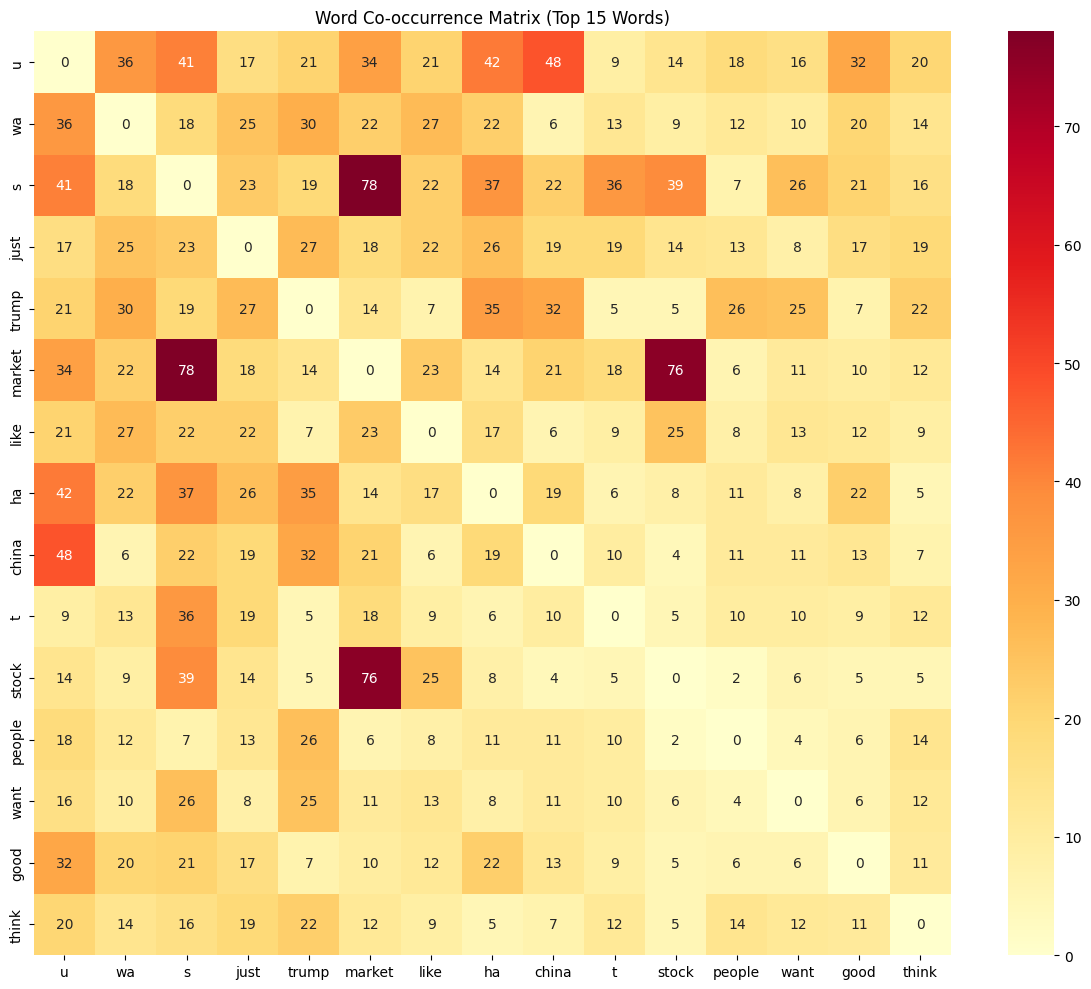

In [101]:
# Heatmap of word co-occurrence (top words)
top_15_words = word_freq.head(15).index.tolist()
tdm_top = tdm_df[top_15_words]
cooccurrence = tdm_top.T.dot(tdm_top)
np.fill_diagonal(cooccurrence.values, 0)

plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Word Co-occurrence Matrix (Top 15 Words)')
plt.tight_layout()
plt.show()

# Phase 2

Frequent Pattern Mining

In [102]:
# transaction database for frequent pattern mining
# Each document becomes a transaction with its tokens

def create_transaction_db(df, category, filename):
    """Create transaction database for a specific category"""
    subset = df[df['category'] == category]
    with open(filename, 'w') as f:
        for text in subset['text']:
            tokens = analyze(text)
            if len(tokens) > 0:
                f.write('\t'.join(tokens) + '\n')
    return filename

In [103]:
# transaction databases for each category
create_transaction_db(X, 0, 'td_freq_db_negative.csv')  # negative
create_transaction_db(X, 1, 'td_freq_db_neutral.csv')   # neutral
create_transaction_db(X, 2, 'td_freq_db_positive.csv')  # positive

# combined database
with open('td_freq_db_all.csv', 'w') as f:
    for text in X['text']:
        tokens = analyze(text)
        if len(tokens) > 0:
            f.write('\t'.join(tokens) + '\n')


In [104]:
# Database statistics
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_all.csv')
obj.run()
obj.printStats()

Database size (total no of transactions) : 812
Number of items : 3507
Minimum Transaction Size : 1
Average Transaction Size : 12.72167487684729
Maximum Transaction Size : 228
Standard Deviation Transaction Size : 20.043275180304445
Variance in Transaction Sizes : 402.2282349225246
Sparsity : 0.9967622812081678


FPGrowth Algorithm

In [105]:
from PAMI.frequentPattern.basic import FPGrowth as alg

#I started with 5 and had to increase to 30
minSup = 30
obj_all = alg.FPGrowth(iFile='td_freq_db_all.csv', minSup=minSup)
obj_all.mine()
frequentPatternsDF_all = obj_all.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_all)))
print('Runtime: ' + str(obj_all.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.009882926940917969


In [106]:
frequentPatternsDF_all.head(20)

,Patterns,Support
0,dollar,30
1,know,30
2,doing,32
3,bond,32
4,did,35
5,day,35
6,thing,35
7,doe,35
8,time,39
9,make,44


In [107]:
# FPGrowth for negative sentiment
minSup = 30
obj_neg = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj_neg.mine()
frequentPatternsDF_negative = obj_neg.getPatternsAsDataFrame()
print('Negative - Total No of patterns: ' + str(len(frequentPatternsDF_negative)))
print('Runtime: ' + str(obj_neg.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Negative - Total No of patterns: 13
Runtime: 0.0069997310638427734


In [108]:
# FPGrowth for neutral sentiment
obj_neu = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj_neu.mine()
frequentPatternsDF_neutral = obj_neu.getPatternsAsDataFrame()
print('Neutral - Total No of patterns: ' + str(len(frequentPatternsDF_neutral)))
print('Runtime: ' + str(obj_neu.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Neutral - Total No of patterns: 71
Runtime: 0.010714054107666016


In [109]:
# FPGrowth for positive sentiment
minSup = 30
obj_pos = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj_pos.mine()
frequentPatternsDF_positive = obj_pos.getPatternsAsDataFrame()
print('Positive - Total No of patterns: ' + str(len(frequentPatternsDF_positive)))
print('Runtime: ' + str(obj_pos.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Positive - Total No of patterns: 0
Runtime: 0.003076791763305664


FAE Top-K Algorithm

In [110]:
from PAMI.frequentPattern.topk import FAE

print("FAE Top-K Results:")
for k in [100, 250, 500]:
    obj_fae = FAE.FAE('td_freq_db_all.csv', k)
    obj_fae.mine()
    print(f"k={k}: Patterns={len(obj_fae.getPatterns())}, Runtime={obj_fae.getRuntime():.4f}s")

FAE Top-K Results:
 TopK frequent patterns were successfully generated using FAE algorithm.
k=100: Patterns=100, Runtime=0.0272s
 TopK frequent patterns were successfully generated using FAE algorithm.
k=250: Patterns=250, Runtime=0.0609s
 TopK frequent patterns were successfully generated using FAE algorithm.
k=500: Patterns=500, Runtime=0.2133s


MaxFPGrowth Algorithm

In [111]:
from PAMI.frequentPattern.maximal import MaxFPGrowth

print("MaxFPGrowth Results:")
for minSup in [3, 5, 7]:
    obj_max = MaxFPGrowth.MaxFPGrowth('td_freq_db_all.csv', minSup)
    obj_max.mine()
    print(f"minSup={minSup}: Patterns={len(obj_max.getPatterns())}, Runtime={obj_max.getRuntime():.4f}s")

MaxFPGrowth Results:
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minSup=3: Patterns=1610, Runtime=9.7127s
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minSup=5: Patterns=816, Runtime=2.7693s
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minSup=7: Patterns=484, Runtime=0.8017s


Data Augmentation with Frequent Patterns

In [112]:
# Select patterns with high support for augmentation
patterns_sorted = frequentPatternsDF_all.sort_values('Support', ascending=False)
selected_patterns = patterns_sorted[patterns_sorted['Support'] >= 5]['Patterns'].tolist()

# Limit to top 500 patterns
if len(selected_patterns) > 500:
    selected_patterns = selected_patterns[:500]

print(f"Selected {len(selected_patterns)} patterns for augmentation")

Selected 180 patterns for augmentation


In [113]:
# Create pattern matrix
X['tokenized_set'] = X['text'].apply(lambda t: set(analyze(t)))

pattern_matrix = pd.DataFrame(0, index=X.index, columns=selected_patterns)

for pattern in selected_patterns:
    pattern_words = set(pattern.split('\t'))
    pattern_matrix[pattern] = X['tokenized_set'].apply(
        lambda x: 1 if pattern_words.issubset(x) else 0
    )

print(f"Pattern matrix shape: {pattern_matrix.shape}")

Pattern matrix shape: (822, 180)


In [114]:
# Create augmented TDM (original TDM + pattern features)
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
print(f"Original TDM shape: {tdm_df.shape}")
print(f"Augmented TDM shape: {augmented_df.shape}")

Original TDM shape: (822, 1336)
Augmented TDM shape: (822, 1516)


Dimensionality redusction

In [115]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(tdm_df.values)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(tdm_df.values)

# UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(tdm_df.values)

c:\Users\Administrator\Documents\MUNI\2\NTNU_fall\Data Mining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



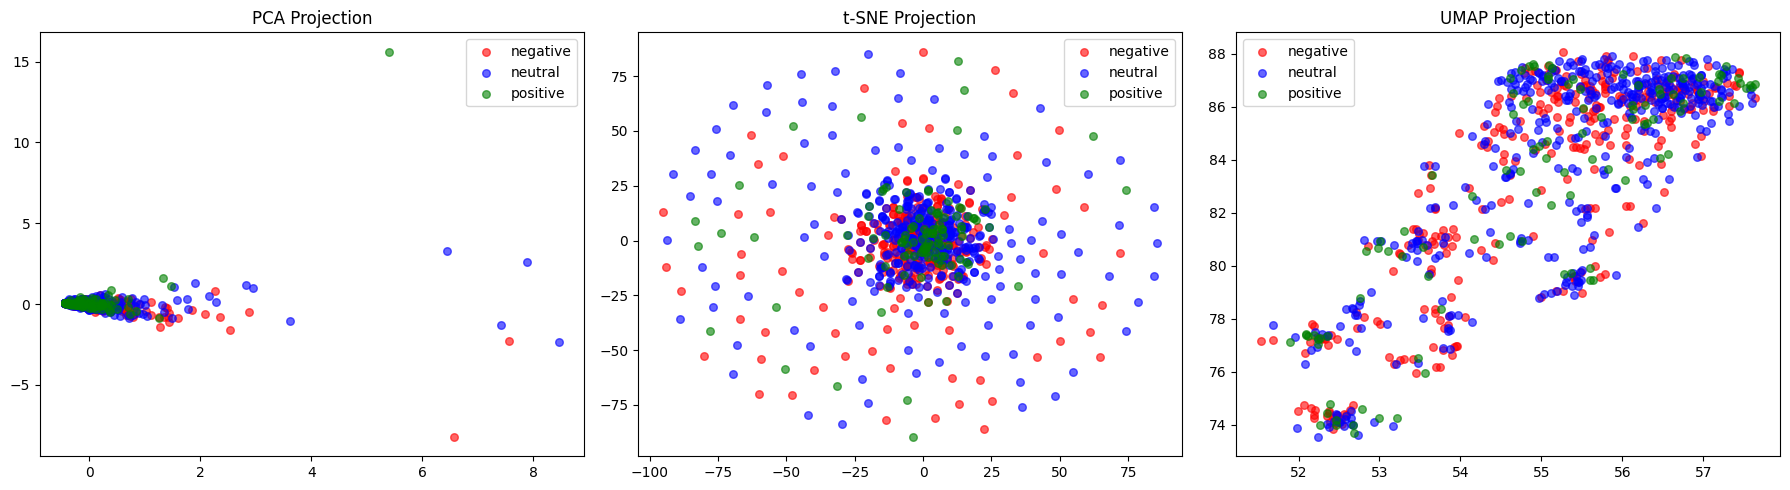

In [116]:
# Visualize dimensionality reduction
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

colors = {'negative': 'red', 'neutral': 'blue', 'positive': 'green'}
labels = X['category_name'].values

for ax, X_reduced, title in zip(axes, [X_pca, X_tsne, X_umap], ['PCA', 't-SNE', 'UMAP']):
    for sentiment in ['negative', 'neutral', 'positive']:
        mask = labels == sentiment
        ax.scatter(X_reduced[mask, 0], X_reduced[mask, 1], 
                   c=colors[sentiment], label=sentiment, alpha=0.6, s=30)
    ax.set_title(f'{title} Projection')
    ax.legend()

plt.tight_layout()
plt.show()

Data classification

Naive Bayes Classifier

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [118]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    tdm_df, X['category'], test_size=0.3, random_state=42
)

In [119]:
X_train.shape

(575, 1336)

In [120]:
X_test.shape

(247, 1336)

In [121]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.6072874493927125

Classification Report:
               precision    recall  f1-score   support

    negative     0.5849    0.6889    0.6327        90
     neutral     0.6640    0.6860    0.6748       121
    positive     0.3125    0.1389    0.1923        36

    accuracy                         0.6073       247
   macro avg     0.5205    0.5046    0.4999       247
weighted avg     0.5839    0.6073    0.5891       247



Naive Bayes with Augmented TDM

In [122]:
# Split the augmented data into training and testing sets (70% train, 30% test)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, X['category'], test_size=0.3, random_state=42
)

# Train the Naive Bayes classifier on augmented data
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# Make predictions on the test set
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# Evaluate the classifier
print("Accuracy (Augmented TDM):", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Accuracy (Augmented TDM): 0.5910931174089069

Classification Report:
               precision    recall  f1-score   support

    negative     0.5727    0.7000    0.6300        90
     neutral     0.6581    0.6364    0.6471       121
    positive     0.3000    0.1667    0.2143        36

    accuracy                         0.5911       247
   macro avg     0.5103    0.5010    0.4971       247
weighted avg     0.5748    0.5911    0.5778       247



TF-IDF Features and Naive Bayes Classification

In [123]:
# Generate TF-IDF features
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X['text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
print(f"TF-IDF Matrix shape: {tfidf_df.shape}")

TF-IDF Matrix shape: (822, 4308)


In [124]:
# Split TF-IDF data
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    tfidf_df, X['category'], test_size=0.3, random_state=42
)

In [125]:
# MultinomialNB with TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("MultinomialNB (TF-IDF) Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf, target_names=target_names, digits=4))

MultinomialNB (TF-IDF) Accuracy: 0.5870445344129555

Classification Report:
               precision    recall  f1-score   support

    negative     0.6462    0.4667    0.5419        90
     neutral     0.5659    0.8512    0.6799       121
    positive     0.0000    0.0000    0.0000        36

    accuracy                         0.5870       247
   macro avg     0.4040    0.4393    0.4073       247
weighted avg     0.5127    0.5870    0.5305       247



c:\Users\Administrator\Documents\MUNI\2\NTNU_fall\Data Mining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Administrator\Documents\MUNI\2\NTNU_fall\Data Mining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Administrator\Documents\MUNI\2\NTNU_fall\Data Mining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [126]:
# ComplementNB with TF-IDF (better for imbalanced data)
nb_comp = ComplementNB()
nb_comp.fit(X_train_tfidf, y_train_tfidf)
y_pred_comp = nb_comp.predict(X_test_tfidf)

print("ComplementNB (TF-IDF) Accuracy:", accuracy_score(y_test_tfidf, y_pred_comp))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_comp, target_names=target_names, digits=4))

ComplementNB (TF-IDF) Accuracy: 0.5708502024291497

Classification Report:
               precision    recall  f1-score   support

    negative     0.6071    0.7556    0.6733        90
     neutral     0.6381    0.5537    0.5929       121
    positive     0.2000    0.1667    0.1818        36

    accuracy                         0.5709       247
   macro avg     0.4817    0.4920    0.4827       247
weighted avg     0.5630    0.5709    0.5623       247



In [127]:
# GaussianNB with TF-IDF
nb_gauss = GaussianNB()
nb_gauss.fit(X_train_tfidf, y_train_tfidf)
y_pred_gauss = nb_gauss.predict(X_test_tfidf)

print("GaussianNB (TF-IDF) Accuracy:", accuracy_score(y_test_tfidf, y_pred_gauss))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_gauss, target_names=target_names, digits=4))

GaussianNB (TF-IDF) Accuracy: 0.4048582995951417

Classification Report:
               precision    recall  f1-score   support

    negative     0.4699    0.4333    0.4509        90
     neutral     0.4634    0.4711    0.4672       121
    positive     0.0976    0.1111    0.1039        36

    accuracy                         0.4049       247
   macro avg     0.3436    0.3385    0.3407       247
weighted avg     0.4124    0.4049    0.4083       247



Decision Tree Classifier

In [128]:
# Decision Tree with only the document-term frequency data
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.582995951417004

Classification Report:
               precision    recall  f1-score   support

    negative     0.5926    0.5333    0.5614        90
     neutral     0.6014    0.7355    0.6617       121
    positive     0.3889    0.1944    0.2593        36

    accuracy                         0.5830       247
   macro avg     0.5276    0.4878    0.4941       247
weighted avg     0.5672    0.5830    0.5665       247



In [129]:
# Decision Tree with augmented data
dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train_aug, y_train_aug)

y_pred_dt_aug = dt_classifier_aug.predict(X_test_aug)
print("Decision Tree Accuracy (Augmented TDM):", accuracy_score(y_test_aug, y_pred_dt_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))

Decision Tree Accuracy (Augmented TDM): 0.6275303643724697

Classification Report:
               precision    recall  f1-score   support

    negative     0.6667    0.5333    0.5926        90
     neutral     0.6266    0.8182    0.7097       121
    positive     0.4706    0.2222    0.3019        36

    accuracy                         0.6275       247
   macro avg     0.5879    0.5246    0.5347       247
weighted avg     0.6185    0.6275    0.6076       247



In [130]:
# Summary comparison
results = {
    'Model': [
        'MultinomialNB (TDM)',
        'MultinomialNB (Augmented TDM)',
        'MultinomialNB (TF-IDF)',
        'ComplementNB (TF-IDF)',
        'GaussianNB (TF-IDF)',
        'DecisionTree (TDM)',
        'DecisionTree (Augmented TDM)'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test_aug, y_pred_aug),
        accuracy_score(y_test_tfidf, y_pred_tfidf),
        accuracy_score(y_test_tfidf, y_pred_comp),
        accuracy_score(y_test_tfidf, y_pred_gauss),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test_aug, y_pred_dt_aug)
    ]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)
print("Classification Results Summary:")
print(results_df.to_string(index=False))

Classification Results Summary:
                        Model  Accuracy
 DecisionTree (Augmented TDM)  0.627530
          MultinomialNB (TDM)  0.607287
MultinomialNB (Augmented TDM)  0.591093
       MultinomialNB (TF-IDF)  0.587045
           DecisionTree (TDM)  0.582996
        ComplementNB (TF-IDF)  0.570850
          GaussianNB (TF-IDF)  0.404858


Overall result is really bad. Acurracy only 62, 50, 59,, 58, 57, or even 40 % is not sufficient enough. It is like flipping a coin.
Interestingly, I started with GaussianNB on 43 % and now, when I improved re, it is even worse (40 %). The rest is getting better, DecisionTree augmented had orriginally 56 %.
I think it could be better with better cleaning the text, like using more regex, or creating better features.
N-grams would help to keep phrases. No frequency filtering to eliminate very rare wirds.
With this set up, preprocessing would definetelly help, and when that would be at a good level, the next step would be testing more complex models. Like LogisticRegression or LinearSVC.
